In [1]:
import tensorflow_core as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_train = y_dataset[arr[0:num_train]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

In [3]:
learning_rate = 0.01
training_epochs = 40

x_dataset = np.linspace(-1, 1, 500)

num_coeffs = 9
y_dataset_params = [0.0] * num_coeffs
y_dataset_params[2] = 1

y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3
(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

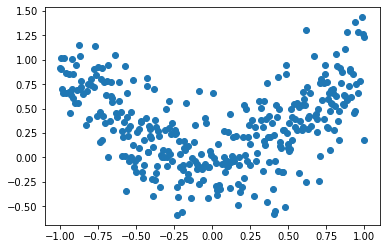

In [4]:
# plot train data
plt.scatter(x_train, y_train)
plt.show()

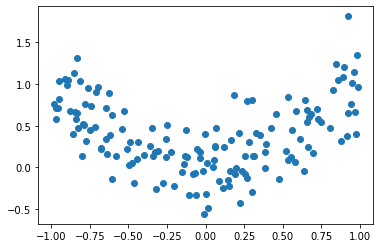

In [5]:
# plot test data
plt.scatter(x_test, y_test)
plt.show()

In [6]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)


w = tf.Variable([0.0] * num_coeffs, name="parameters")
y_model = model(X, w)

cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

final_cost = sess.run(cost, feed_dict={X: x_test, Y: y_test})

w_val = sess.run(w)
sess.close()

print("===== Done training =====")

===== Done training =====


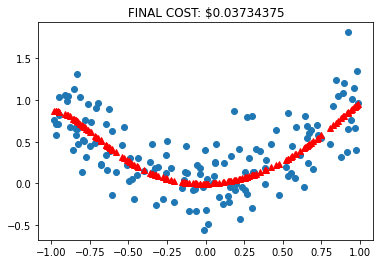

In [7]:
plt.scatter(x_test, y_test)

y_learned = 0
for i in range(num_coeffs):
    y_learned += w_val[i] * np.power(x_test, i)

plt.plot(x_test, y_learned, "r^")
plt.title(f"FINAL COST: ${np.sum(final_cost) / x_train.size}")
plt.show()